# Time Series with Pandas

- 시계열 데이터는 시간 데이터를 인덱스로 하는 연속된 데이터입니다.
- 시간 데이터를 python의 DateTime 타입으로 바꾸어 Pandas가 제공하는 시계열 데이터를 처리하는 아래 기능들을 학습합니다.
```
 1) DataTime 인덱스
 2) Time Resampling
 3) Time Shifts
 4) Rolling Expanding
```

## Date TIme Index
- time 또는 date 정보는 별개의 칼럼이기보다는 인덱스인 경우가 많습니다.
- Pandas에 내장된 기능들로 DateTime 인덱스를 생성하고 활용하는 방법을 다룹니다.

## Time Resampling
- 시계열 데이터의 인덱스는 시(hours), 분(minutes) 등 작은 단위 DateTime 인덱스로 이뤄진 경우도 많습니다.
- 더 넓은 주기로 데이터를 집계(aggregate) 해야 하는 경우 Time Resampling 이 필요합니다.
- groupby 를 사용함으로써 Time Resampling을 수행할 수는 있지만, 비즈니스 도메인에서 분기나 회계년도를 편리하게 처리할 방법은 못됩니다.
- Pandas는 이런 경우에 활용할 수 있는 frequency sampling 도구를 지원합니다.

## Time Shifting
- 시계열 분석 알고리즘을 사용하기 위해 데이터를 임의 시간만큼 앞 또는 뒤로 이동시켜야 할 때가 있습니다.
- Pandas는 이런 경우에도 매우 쉬운 방법을 제공합니다.

## Rolling Expanding
- 매일 수집한 데이터들에는 노이즈가 포함되기도 합니다.
- 이럴 경우 데이터의 일반적인 트렌드를 구하기 위해 rolling mean(또는 moving average)를 사용하기도 합니다.
- Pandas에 내장된 rolling함수를 이용하면 주어진 시한 내 평균 (rolling mean) 등을 구할 수 있습니다.
- 임의 시간 간격의 window를 만들고 그 안에서 mean 같은 통계적 aggregation 을 실행하면 됩니다.
- Rolling : 윈도우 사이즈를 정하고 그 기간만큼 평균을 구한다.
-  / Expanding : 현재 기준되는 시점을 고정시키고 span만큼 기간을 증가시킨다. 

### 관련 패키지 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

In [96]:
today = datetime(2019,8,7) # 시, 분 : default(0)이 호출된다.
today

datetime.datetime(2019, 8, 7, 0, 0)

##### 멤버변수로 각 년, 월, 일 접근가능

In [97]:
today.day

7

In [98]:
today.year

2019

In [99]:
today.month

8

In [100]:
dates = [datetime(2019,8,4),datetime(2019,8,3)]
dates # 배열로 호출

[datetime.datetime(2019, 8, 4, 0, 0), datetime.datetime(2019, 8, 3, 0, 0)]

In [101]:
# 인덱스로 만든다!.
dt_index = pd.DatetimeIndex(dates)
dt_index

DatetimeIndex(['2019-08-04', '2019-08-03'], dtype='datetime64[ns]', freq=None)

In [102]:
data = np.random.randn(2,2)

In [103]:
cols = ['A','B']

In [104]:
 df = pd.DataFrame(data = data, index = dt_index, columns  = cols)

In [105]:
df.index.max()

Timestamp('2019-08-04 00:00:00')

In [106]:
df.index.argmax() # 시리즈의 인덱스의 최대값을 표현해주기 떄문에 0 과 1로 나타난다.?

0

## RESAMPLING

In [107]:
df = pd.read_csv('data/apple_stock.csv')

In [108]:
# index 가 datetime가 아니다.
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [109]:
df.info()
# object ; int, float, numeric데이터가 아니면 전부 object ex) string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
Date         2265 non-null object
High         2265 non-null float64
Low          2265 non-null float64
Open         2265 non-null float64
Close        2265 non-null float64
Volume       2265 non-null float64
Adj Close    2265 non-null float64
dtypes: float64(6), object(1)
memory usage: 123.9+ KB


##### object -> datetime타입으로 바꾸는 방법 - Date가 열에 있을 경우

In [110]:
df['Date'] = df['Date'].apply(pd.to_datetime)

In [111]:
df.set_index('Date',inplace = True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2265 entries, 2009-12-31 to 2018-12-31
Data columns (total 6 columns):
High         2265 non-null float64
Low          2265 non-null float64
Open         2265 non-null float64
Close        2265 non-null float64
Volume       2265 non-null float64
Adj Close    2265 non-null float64
dtypes: float64(6)
memory usage: 123.9 KB


In [113]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


#### resampling을 몰랐을 경우
- monthly 합계 구하자

In [114]:
# index의 월 접근
df.index.month

Int64Index([12,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=2265)

In [115]:
df['Month']  = df.index.month


In [116]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,Month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,1
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,1
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,1


In [130]:
# 월별 합계를 구한다.
df.groupby('Month').agg(sum)
# 문제 연도별 합계가 안나오고 전체 연도를 합한 월별 합계가 나와버렸다..

,High,Low,Open,Close,Volume,Adj Close
Month,,,,,,
1,16141.351418,15840.451458,16007.617104,15989.401403,1.748822e+10,14038.491524
2,15739.942860,15445.045748,15572.844261,15607.478556,1.511651e+10,13799.143261
3,18676.318544,18358.607164,18522.812897,18516.759998,1.646522e+10,16387.278601
4,17763.422855,17444.350006,17612.804337,17595.992851,1.656252e+10,15549.686649
5,18874.642849,18552.902849,18711.531479,18731.747120,1.595049e+10,16741.255772
6,19040.630035,18743.354290,18909.838608,18881.168510,1.427367e+10,16927.685444
7,18908.574245,18616.531422,18760.998562,18775.181419,1.403693e+10,16779.291849
8,21322.417149,20943.891430,21113.692909,21152.527245,1.505109e+10,19060.226547
9,19596.267178,19222.517181,19423.325752,19400.800022,1.547466e+10,17478.810833


In [49]:
# 칼럼을 지정안하고 곧바로 year기준으로 합계구하기
df.groupby(df.index.year).sum()

,High,Low,Open,Close,Volume,Adj Close,Month
Date,,,,,,,
2009,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


In [50]:
# month, year합쳐서 구해보기
df.groupby([df.index.year,df.index.month]).agg(sum)

High          Low         Open        Close        Volume  \
Date Date                                                                     
2009 12      30.478571    30.080000    30.447144    30.104286  8.810270e+07   
2010 1      573.331425   557.244289   568.397141   563.798571  3.792249e+09   
     2      544.092857   532.875715   537.678570   539.588568  2.694020e+09   
     3      738.235716   727.080000   732.047146   734.064285  3.038543e+09   
     4      759.410004   744.359997   753.004292   753.445721  3.091782e+09   
     5      730.337135   699.494276   719.941429   718.461422  4.520664e+09   
     6      832.535709   812.074276   824.641434   820.742855  4.162813e+09   
     7      775.377140   753.262863   766.438568   764.849998  3.917426e+09   
     8      797.491417   783.245712   790.775719   789.872864  2.397280e+09   
     9      827.359993   811.739990   818.522850   821.552849  2.962480e+09   
     10     909.855713   893.007137   901.279999   902.802849  3.058644e+09   
     11     941.915722   926.407131   934.340004   934.764286  2.377022e+09   
     12    1015.334286  1005.722858  1011.407139  1010.384293  1.743309e+09   
2011 1      973.799992   955.328583   964.618561   966.800003  2.710384e+09   
     2      958.600002   944.887138   950.895706   953.210007  2.323987e+09   
     3     1151.114277  1131.195709  1143.562855  1141.755714  2.826615e+09   
     4      981.997139   965.321423   975.171432   972.615704  2.313457e+09   
     5     1032.851433  1018.240005  1025.958569  1025.354282  1.728015e+09   
     6     1051.567142  1031.604290  1043.190010  1040.541424  2.315963e+09   
     7     1071.921425  1050.395718  1058.758564  1063.537140  2.663487e+09   
     8     1254.649998  1219.489994  1239.569992  1237.934288  4.035650e+09   
     9     1191.664288  1164.200008  1177.138565  1177.480000  2.994362e+09   
     10    1205.449989  1174.577141  1190.231430  1191.690002  3.285357e+09   
     11    1166.638569  1145.058582  1158.804287  1154.445717  2.240925e+09   
     12    1186.994286  1170.418564  1178.311428  1178.791431  1.576633e+09   
2012 1     1231.452858  1216.601433  1225.028564  1224.508568  1.714964e+09   
     2     1430.997147  1404.107147  1413.722862  1421.631432  2.842139e+09   
     3     1829.345703  1792.201431  1812.982857  1815.024284  3.896084e+09   
     4     1758.535728  1710.428566  1741.735703  1731.437141  3.899748e+09   
     5     1798.158585  1754.962852  1778.181435  1774.687134  2.776586e+09   
...                ...          ...          ...          ...           ...   
2016 7     1983.279999  1960.049995  1969.019989  1971.129997  6.857796e+08   
     8     2487.230011  2460.689995  2471.650002  2476.300018  6.301285e+08   
     9     2346.650017  2305.960007  2324.140015  2327.999992  9.680156e+08   
     10    2444.150002  2413.769981  2430.619980  2429.850006  6.869143e+08   
     11    2332.439995  2288.760017  2311.729988  2313.239990  7.213055e+08   
     12    2415.529991  2384.449997  2393.909988  2401.050003  6.087717e+08   
2017 1     2397.619995  2375.710007  2381.869987  2391.399994  5.631220e+08   
     2     2549.070007  2523.899986  2531.460014  2540.569977  5.749686e+08   
     3     3247.550003  3213.309982  3228.330002  3234.210007  5.616284e+08   
     4     2728.360001  2704.219986  2717.570023  2714.849991  3.733041e+08   
     5     3367.349991  3324.390015  3343.249985  3349.009979  6.539818e+08   
     6     3279.949997  3224.819992  3260.730026  3252.289963  6.841781e+08   
     7     2983.529999  2942.110031  2961.930008  2965.989990  4.220119e+08   
     8     3683.490021  3629.480026  3655.780029  3657.490036  6.610690e+08   
     9     3177.390030  3128.930008  3162.180008  3152.169998  6.803741e+08   
     10    3488.910004  3446.750031  3461.829956  3471.979996  5.042913e+08   
     11    3641.990005  3590.809998  3622.299988  3620.530014  6.006634e+08   
     12    3457.709991  3416.970016  3434.439987  3437.830002  5.308

## resample()
시계열 데이터를 처리할 때 자주 하는 것 중 하나가 시간 인덱스를 기준으로 resampling 하는 것입니다. 그러기 위해 **resample** 메서드를 사용합니다.

#### timeseries [offset alias](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases) (중요)

<table border="1" class="docutils">
<colgroup>
<col width="13%" />
<col width="87%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Alias</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>B</td>
<td>business day frequency</td>
</tr>
<tr class="row-odd"><td>C</td>
<td>custom business day frequency (experimental)</td>
</tr>
<tr class="row-even"><td>D</td>
<td>calendar day frequency</td>
</tr>
<tr class="row-odd"><td>W</td>
<td>weekly frequency</td>
</tr>
<tr class="row-even"><td>M</td>
<td>month end frequency</td>
</tr>
<tr class="row-odd"><td>SM</td>
<td>semi-month end frequency (15th and end of month)</td>
</tr>
<tr class="row-even"><td>BM</td>
<td>business month end frequency</td>
</tr>
<tr class="row-odd"><td>CBM</td>
<td>custom business month end frequency</td>
</tr>
<tr class="row-even"><td>MS</td>
<td>month start frequency</td>
</tr>
<tr class="row-odd"><td>SMS</td>
<td>semi-month start frequency (1st and 15th)</td>
</tr>
<tr class="row-even"><td>BMS</td>
<td>business month start frequency</td>
</tr>
<tr class="row-odd"><td>CBMS</td>
<td>custom business month start frequency</td>
</tr>
<tr class="row-even"><td>Q</td>
<td>quarter end frequency</td>
</tr>
<tr class="row-odd"><td>BQ</td>
<td>business quarter endfrequency</td>
</tr>
<tr class="row-even"><td>QS</td>
<td>quarter start frequency</td>
</tr>
<tr class="row-odd"><td>BQS</td>
<td>business quarter start frequency</td>
</tr>
<tr class="row-even"><td>A</td>
<td>year end frequency</td>
</tr>
<tr class="row-odd"><td>BA</td>
<td>business year end frequency</td>
</tr>
<tr class="row-even"><td>AS</td>
<td>year start frequency</td>
</tr>
<tr class="row-odd"><td>BAS</td>
<td>business year start frequency</td>
</tr>
<tr class="row-even"><td>BH</td>
<td>business hour frequency</td>
</tr>
<tr class="row-odd"><td>H</td>
<td>hourly frequency</td>
</tr>
<tr class="row-even"><td>T, min</td>
<td>minutely frequency</td>
</tr>
<tr class="row-odd"><td>S</td>
<td>secondly frequency</td>
</tr>
<tr class="row-even"><td>L, ms</td>
<td>milliseconds</td>
</tr>
<tr class="row-odd"><td>U, us</td>
<td>microseconds</td>
</tr>
<tr class="row-even"><td>N</td>
<td>nanoseconds</td>
</tr>
</tbody>
</table>

In [52]:
# 연별로 groupby 하는 방식
df.resample(rule = "A")

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [53]:
# 매년 12월31일 기준으로 sum 한것 / mean()도 가능!
df.resample(rule = "A").sum()

,High,Low,Open,Close,Volume,Adj Close,Month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010-12-31,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011-12-31,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012-12-31,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013-12-31,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014-12-31,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015-12-31,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016-12-31,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017-12-31,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


In [54]:
# 2009년도 평균 추출
df.resample(rule = 'A').mean()['2009']

,High,Low,Open,Close,Volume,Adj Close,Month
Date,,,,,,,
2009-12-31,30.478571,30.08,30.447144,30.104286,88102700.0,20.159719,12.0


#### custom방식으로 resampling가능 - 매년 첫번째 날의 값을 뽑고싶다.

In [55]:
# 첫번째 값을 리턴해주는 함수
def first_day(sample):
    return sample[0]

In [56]:
df.resample(rule = 'A').apply(first_day)

,High,Low,Open,Close,Volume,Adj Close,Month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688,1
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778,1
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737,1
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503,1
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631,1
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850,1
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964,1


##### 종가의  연평균을 bar chart로 그려라

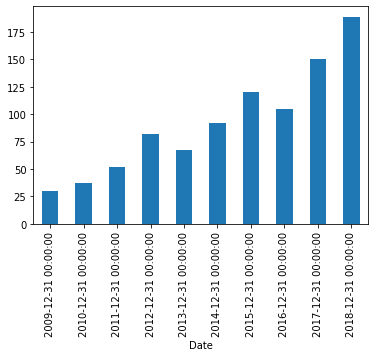

In [57]:
df['Close'].resample(rule = 'A').mean().plot(kind ='bar')

##### 오픈 가격의 월별 최대값을 bar chart로 그려라 + 범위 제한(2015년  8월~ 12월)

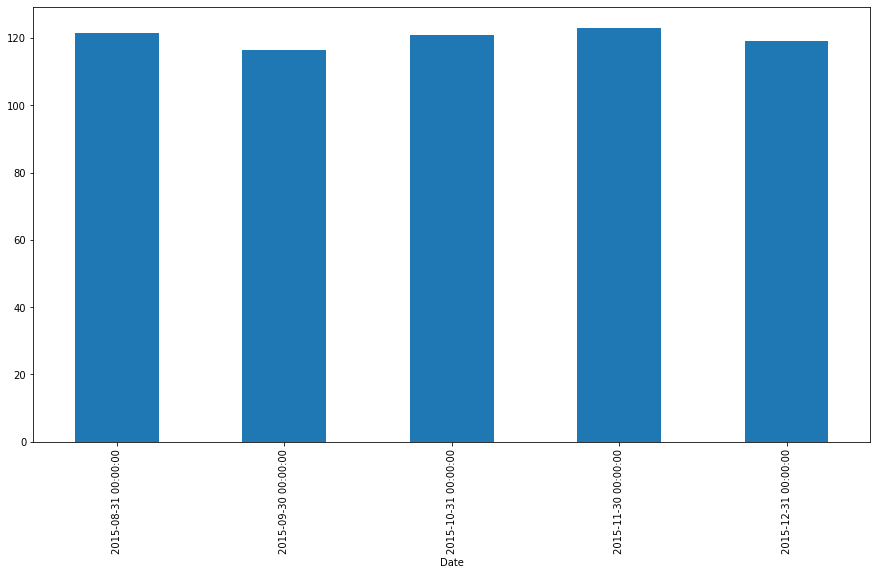

In [66]:
df['Open']['2015-8':'2015-12'].resample(rule = 'M').max().plot(kind = 'bar',figsize = (15,8))
# 판다스는 데이트타임 타입에 몇가지 패턴이 있음 : 2015-8 or 2015/8

In [70]:
daily_daterange = pd.date_range(start = datetime(2018,8,1),end = datetime(2019,1,24), freq = 'B' )
# Bussiness day만 인덱싱 ~ 주말뺴고 평일만 추출

In [71]:
daily_dataset = pd.DataFrame(data = {'value':np.random.rand(len(daily_daterange))},index = daily_daterange)

In [72]:
# 주말이 없는 요일의 데이터 프레임.
daily_dataset.head(10)

,value
2018-08-01,0.117012
2018-08-02,0.637232
2018-08-03,0.914357
2018-08-06,0.411081
2018-08-07,0.067317
2018-08-08,0.694942
2018-08-09,0.214622
2018-08-10,0.102583
2018-08-13,0.795322
2018-08-14,0.421340


#### W 뒤에 MON, 등 요일을 붙이면 다양하게 응용가능 

In [76]:
# 해당 주의 미니멈 값을 월요일 값으로 표현하자.
daily_dataset.resample("W-MON").min()

,value
2018-08-06,0.117012
2018-08-13,0.067317
2018-08-20,0.232472
2018-08-27,0.023345
2018-09-03,0.160137
2018-09-10,0.362505
2018-09-17,0.410181
2018-09-24,0.143882
2018-10-01,0.262009
2018-10-08,0.084311


In [80]:
# 해당 월의 마지막 날에 최소값을 할당한다.
daily_dataset.resample('M').min()

,value
2018-08-31,0.023345
2018-09-30,0.143882
2018-10-31,0.005654
2018-11-30,0.015902
2018-12-31,0.008067
2019-01-31,0.065200


## Shifting

In [3]:
df = pd.read_csv('data/apple_stock.csv',index_col = 'Date') # 바로 인덱스로 Date를 불러오게 만든다.

In [4]:
df.index

Index(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=2265)

##### datetime으로 바꾸는 또 다른 방법 - index에 있는 Date의 타입을 바꾸자!

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


#### numpy배열을 이용해서 한 스텝 쉬프팅데이터를 보여준다.

In [11]:
temp = np.asarray(df['Close']) # 종가를 넘파이 배열로 변환

In [13]:
temp[:-1] # 마지막 한개 전까지 shift

array([ 30.10428619,  30.5728569 ,  30.62571335, ..., 157.16999817,
       156.1499939 , 156.22999573])

In [12]:
temp[1:] # 2번쨰 부터 마지막까지 shift

array([ 30.5728569 ,  30.62571335,  30.13857079, ..., 156.1499939 ,
       156.22999573, 157.74000549])

#### pandas에서 shift를 쉽게 하는 기능을 제공

In [15]:
df.shift(1).head()
# 데이터가 "1칸" 쉬프트 한다! ~ 쉬프트 한 것만큼 데이터를 잃게 된다.

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680


In [18]:
df.shift(1).tail() # 원래의 맨 마지막 데이터가 사라지는 단점 존재.

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,158.160004,149.630005,156.860001,150.729996,95744600.0,150.729996
2018-12-26,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-27,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-28,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-31,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996


In [20]:
# 거꾸로도 가능 - 원래의 처음 데이터가 없어진다.
df.shift(-1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-04,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-05,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-06,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
2010-01-07,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305


In [21]:
df.shift(-1).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-26,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-27,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996
2018-12-28,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN


#### 위의 현상을 lagging했다라고 말한다.

In [24]:
# "한달씩 뒤로 밀려 출력된다." ~ 이전 마지막달의 데이터가 나온다 
df.tshift(freq = 'M',periods = 1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-31,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-31,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-31,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


## Rolling & Expanding

In [28]:
pd.read_csv('data/apple_stock.csv',index_col = 'Date',parse_dates = True)
# parse_dates = True : 컬럼에 대해서 검사를 해서 자기가 파싱할 수 있는 형태의 칼럼이 발견해면 DateTime형태로 바꿔서 출력
# 나 -> 전체 열을 보면서 DateTime으로 바꾸고 나서 index_col으로 Date로 만든다.
# parse_dates = [] : 리스트 형태로 만들어서 원하는 칼럼을 지정하여 DateTime으로 바꿀 수 있다. 
# - 직접 지정하여 True일때의 에러를 방지.

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,20.100410
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,19.871763
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,20.152065


In [26]:
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

##### 파싱이 안돼는 칼럼은 어떻게 하느냐?
- 2019-Jaunary - 01, 19-08-02 : 파싱이 안되는 케이스

##### 이럴 때는 직접 함수를 만들어 파싱한다!

In [32]:
def dateparser(str_dt):
    return pd.datetime.strptime(str_dt,"%Y-%m-%d")
# %Y-%m-%d : 내 자료의 연, 월, 일 형태를 보고 순서를 바꿔준다
# 그러면 datetime에 잘 뜬다.

In [33]:
dateparser('2019-01-01')

datetime.datetime(2019, 1, 1, 0, 0)

In [36]:
df = pd.read_csv("data/apple_stock.csv",index_col = 'Date', parse_dates = ["Date"],date_parser = dateparser)
# dateparser이용해서 Date칼럼을 파싱하고 그것을 인덱스 로 만든다

##### df.rolling(period) : moving average처럼 트렌드를 알기 위해 많이 사용

In [42]:
# window를 7개로 잡고 7개씩 옮겨가면서 sampling을 한다.
# 앞의 6개의 데이터가 모자란다. ~ 일주일 지나기 전까지 데이터가 부족하기 때문
df.rolling(7).mean().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN


##### 주식의 오픈가격에 대해 트렌드를 알고 싶다.

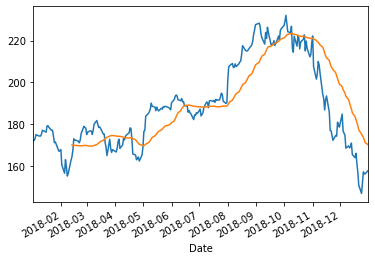

In [50]:
df['2018':]['Close'].plot() # 원래 데이터 : 파란색
df['2018':].rolling(window = 30).mean()['Close'].plot() # 주황색 : 트렌드를 그려줌.
# 30일치를 평균구해서 맨 마지막 30일이 지난 데이터를 할당했기 때문에 "트렌드 선"이 원래 데이터를 뒤따라가는 형태를 보여줄 수 밖에 없다.
# 단점이다! ~ window 사이즈가 크면 클수록 실제 트렌드를 반영하지 못한다.

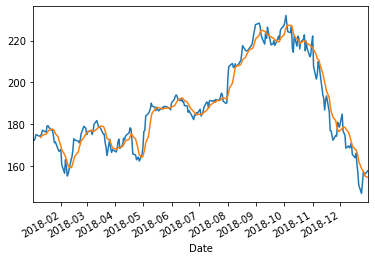

In [52]:
df['2018':]['Close'].plot() # 원래 데이터 : 파란색
df['2018':].rolling(window = 7).mean()['Close'].plot() # 주황색 : 트렌드
# 일주일이면 트렌드선이 원래 데이터를 빨리 따라간다.

In [53]:
df['Close : 30 Day Mean'] = df["Close"].rolling(30).mean()

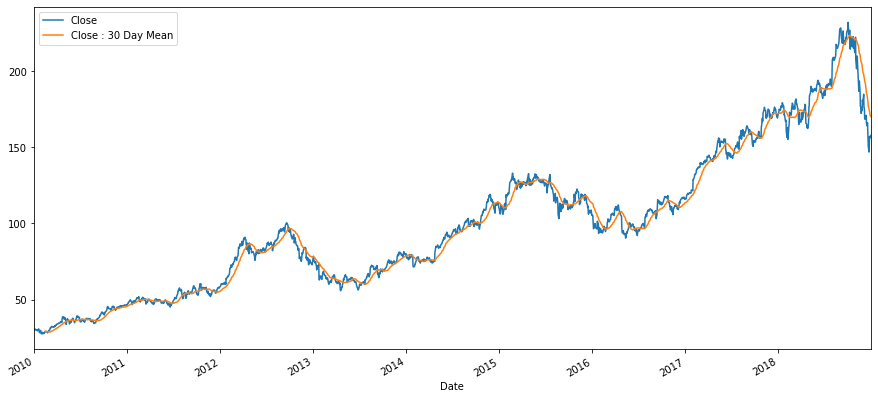

In [55]:
df[['Close','Close : 30 Day Mean']].plot(figsize = (15,7))
# 종가와 30일 기준 트렌드를 같이 그림

#### 지금부터는 Expanding설명!

In [58]:
list(range(10))
# rolling(2) : 0,1 / 1,2 / 2,3 .. 순서로 옮겨간다.
# expanding : 0을 기준으로 할 경우 0 / 0,1 / 0, 1,2 / 0,1,2,3 ... 처럼 개수를 늘려간다.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

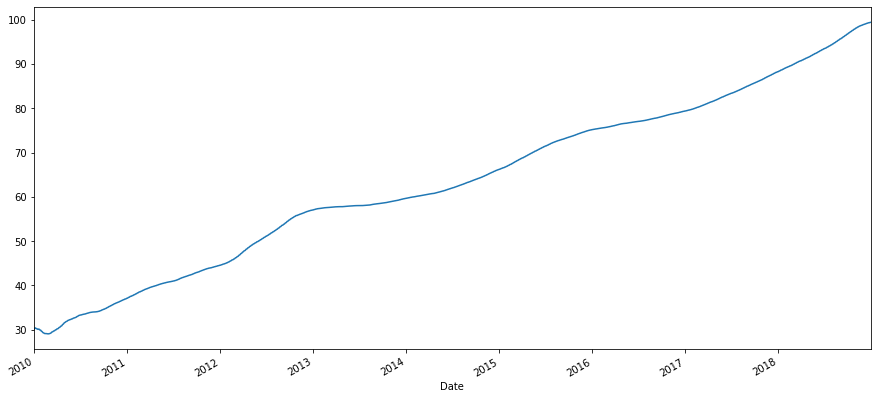

In [62]:
# 늘려가는 기간을 1기간으로 잡자.
df["Close"].expanding(min_periods = 1).mean().plot(figsize = (15,7))

##### 볼린져 밴드를 그려보자!!

### 아래 2 행과 같은 형식으로 그리면 된다.

In [53]:
df['Close : 30 Day Mean'] = df["Close"].rolling(30).mean()

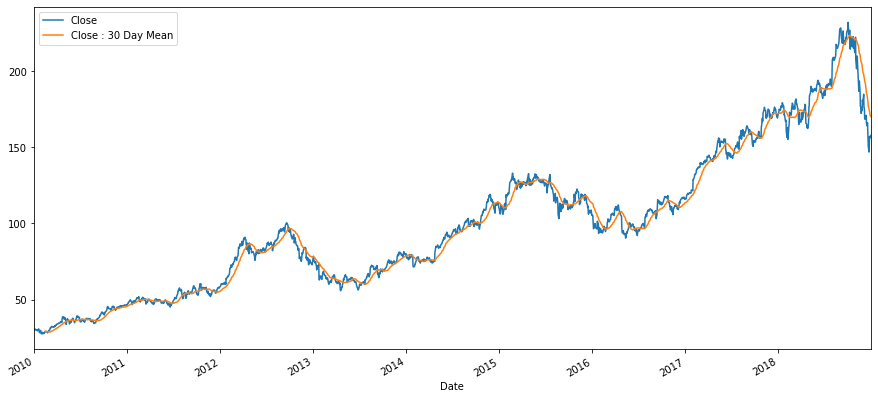

In [55]:
df[['Close','Close : 30 Day Mean']].plot(figsize = (15,7))
# 종가와 30일 기준 트렌드를 같이 그림

##### stop price로 볼린져밴드를 그려보자!
- 종가의 20일 단위의 평균 트렌드값 : 위 아래 2 시그마를 더해주고 20일치를 롤링한다.

In [83]:
df['Close : 20 Day Mean'] = df["Close"].rolling(20).mean()

In [84]:
# rolling한 것의 2 시그마 위에 있는 값을 생성 "UPPER"
df['Upper'] = df['Close : 20 Day Mean'] + 2*df['Close'].rolling(20).std()

In [85]:
# rolling한 것의 2 시그마 아래에 있는 값을 생성 "Lower"
df['Lower'] = df['Close : 20 Day Mean'] - 2*df['Close'].rolling(20).std()

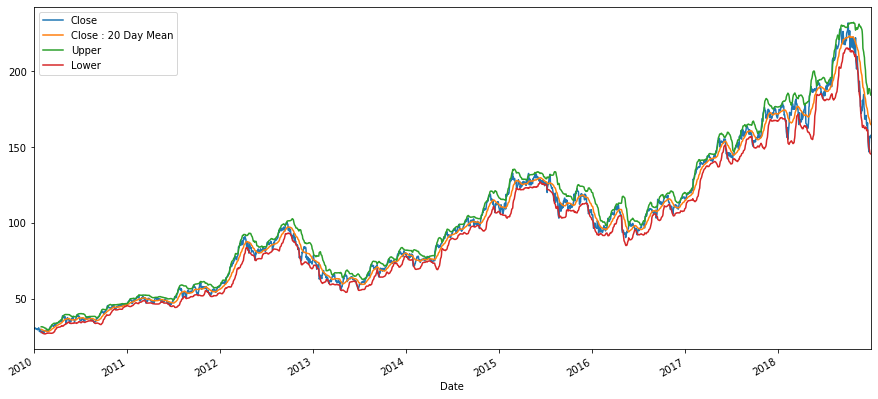

In [86]:
df[['Close','Close : 20 Day Mean', 'Upper','Lower']].plot(figsize = (15,7))

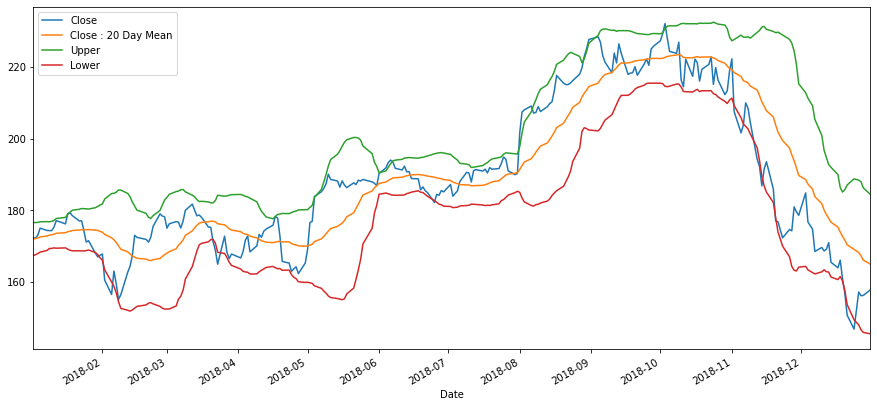

In [87]:
df['2018':][['Close','Close : 20 Day Mean', 'Upper','Lower']].plot(figsize = (15,7))